# Развлекательное приложение Procrastinate Pro+.
## Entertainment-app-Procrastinate-Pro+.

##### Огромные вложения в рекламу, но последние несколько месяцев компания терпит убытки. 

  
#### `Задача:` Разобраться в причинах убытков и помочь компании выйти в плюс.      

#### `Цель:`  Выделить причины неэффективности привлечения пользователей и дать рекомендации отделу маркетинга.
  
#### `Основные вопросы исследования:`  
  
- откуда приходят пользователи и какими устройствами они пользуются,  
- сколько стоит привлечение пользователей из различных рекламных каналов,  
- сколько денег приносит каждый клиент,  
- когда расходы на привлечение клиента окупаются,  
- какие факторы мешают привлечению клиентов. 
  
#### `Данные:`  О пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,  
- выгрузка их покупок за этот период,  
- рекламные расходы.   

#### `Описание данных:`

   ##### `Структура visits_info_short.csv:`  
  
`User Id` — уникальный идентификатор пользователя  
`Region` — страна пользователя  
`Device` — тип устройства пользователя  
`Channel` — идентификатор источника перехода  
`Session Start` — дата и время начала сессии  
`Session End` — дата и время окончания сессии 

   ##### `Структура orders_info_short.csv:`  
   
`User Id` — уникальный идентификатор пользователя 
`Event Dt` — дата и время покупки  
`Revenue` — сумма заказа 
   
   ##### `Структура costs_info_short.csv:`  
   
`dt` — дата проведения рекламной кампании  
`Channel` — идентификатор рекламного источника 
`costs` — расходы на эту кампанию 
   
   
#### `Требования к исследованию:`

Подготовить данные
  
Выбрать подходящие типы визуализации  
  
Верно интерпретировать графики  

Правильно рассчитать и проанализировать метрики  

Аргументировать метриками рекомендации маркетологам  

Сформировать логичную структуру проекта  

Написать «чистый» и эффективный код  

Сделать корректные выводы

## Часть 1. Изучение общей информации

### Загрузка данных

О визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

#### Получение данных

In [71]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from termcolor import cprint # жирный шрифт

# не показывать предупреждения
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')

In [72]:
# открытие файла
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # лог сервера с информацией о посещениях сайта
    pd.read_csv('/datasets/orders_info_short.csv'),  # информация о заказах
    pd.read_csv('/datasets/costs_info_short.csv'),  # расходы на рекламу
)
except:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net//datasets/visits_info_short.csv'),  
    pd.read_csv('https://code.s3.yandex.net//datasets/orders_info_short.csv'),  
    pd.read_csv('https://code.s3.yandex.net//datasets/costs_info_short.csv'),  
)
sns.set() 

### Изучение данных

In [73]:
# функция для изучения данных
def df_analysis(df):
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Вывод 2 строк таблицы с начала и с конца с заголовками', 'green', attrs=['bold'])
    display(df.head(2), df.tail(2))
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Запрос всех атрибутов', 'green', attrs=['bold'])
    print(' ')
    print(df.info())
    print('_________________________________________________________________________________________________________')    
    print(' ')
    cprint('Числовое описание данных', 'green', attrs=['bold'])
    print(' ')
    print(df.describe().T.round(1))
    print('_________________________________________________________________________________________________________') 
    print(' ')
    cprint('Пропущенные значения', 'green', attrs=['bold'])
    print(' ')
    df_pass = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
    df_pass.columns = ['pass']
    df_pass['perc, %'] = (df_pass['pass']/len(df)*100).round(1) 
    print(df_pass) 
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Количество явных дубликатов', 'green', attrs=['bold'])
    print(' ')
    print(df.duplicated().sum())
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Общая обзорная гистограмма для столбцов с числовыми данными', 'green', attrs=['bold'])
    print(' ')
    df.hist(figsize=(6, 3))
    plt.show()
    print('_________________________________________________________________________________________________________')

##### Датафрейм 'visits' 

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


,User Id,Region,Device,Channel,Session Start,Session End
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
_________________________________________________________________________________________________________
 
Числовое описание данных
 
            count          mean           std       min           25%  \
User Id  309901.0  4.997664e+11  2.887899e+11  599326.0  2.493691e+11   

                  50%           75%           max  
User Id  4.98990

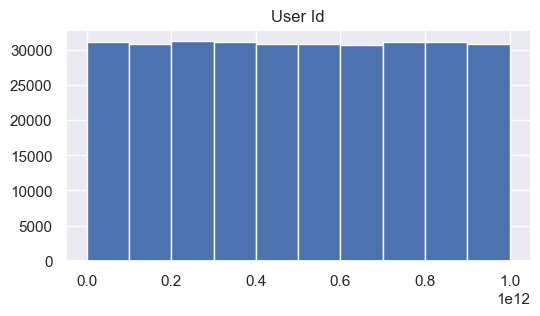

_________________________________________________________________________________________________________


In [74]:
df_analysis(visits) # применение функции к нужному датафрейму

In [75]:
# код для просмотра уникальных значений
a = visits['Channel'].unique()
#display(a)
display(sorted(a))

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

**Вывод по visits:**  
  
- явные дубликаты отсутствуют
- пропущенные значения отсутствуют
- неявные дубликаты не выявлены  
(['Region'] ['United States', 'UK', 'France', 'Germany'])  
(['Device'] ['iPhone', 'Mac', 'Android', 'PC'])  
(['Channel'] ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia',  
'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds', 'organic'])  
- заголовки необходимо привести к нижнему регистру
- заголовки необходимо привести к формату snake_case (змеиный_регистр)
- Session Start и Session End преобразовать к формату datetime


##### Датафрейм 'orders' 

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99


,User Id,Event Dt,Revenue
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
_________________________________________________________________________________________________________
 
Числовое описание данных
 
           count          mean           std       min           25%  \
User Id  40212.0  4.990295e+11  2.860937e+11  599326.0  2.511324e+11   
Revenue  40212.0  5.400000e+00  3.500000e+00       5.0  5.000000e+00   

                  50%           75%           max  
User Id  4.982840e+11  7.433327e+11  9.998954e+11  
Revenue  5.000000e+00  5.000000e+00  5.0

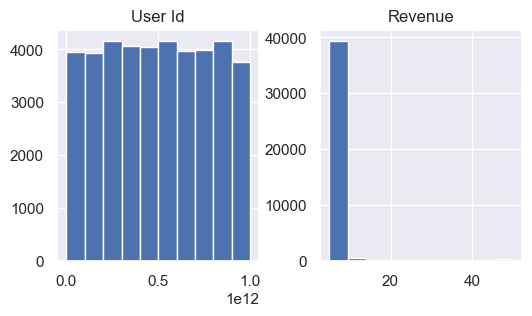

_________________________________________________________________________________________________________


In [76]:
df_analysis(orders) # применение функции к нужному датафрейму

**Вывод по orders:**  
  
- явные дубликаты отсутствуют
- пропущенные значения отсутствуют
- заголовки необходимо привести к нижнему регистру
- заголовки необходимо привести к формату snake_case (змеиный_регистр)
- Event Dt преобразовать к формату datetime

##### Датафрейм 'costs' 

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


,dt,Channel,costs
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
_________________________________________________________________________________________________________
 
Числовое описание данных
 
        count  mean    std  min  25%   50%   75%    max
costs  1800.0  58.6  107.7  0.8  6.5  12.3  33.6  630.0
_________________________________________________________________________________________________________
 
Пропущенные значения
 
         pass  perc, %
dt          0      0.0
Channel     0      0.0
costs       0      0.0
____________________________________________

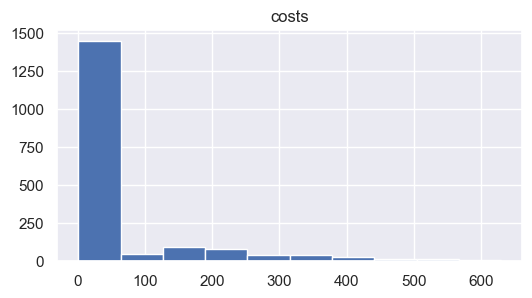

_________________________________________________________________________________________________________


In [77]:
df_analysis(costs) # применение функции к нужному датафрейму

In [78]:
# код для просмотра уникальных значений
a1 = costs['Channel'].unique()
#display(a1)
display(sorted(a1))

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

**Вывод по costs:**  
  
- явные дубликаты отсутствуют
- пропущенные значения отсутствуют
- неявные дубликаты не выявлены  
(['Channel'] ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia',  
'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds', 'organic'])  
- заголовки необходимо привести к нижнему регистру
- dt преобразовать к формату datetime

## Часть 2. Подготовка данных

### Предобработка данных 

#### Приведение к нижнему регистру и формату snake_case

In [79]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_') 
visits.columns # список названий всех столбцов - проверка

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [80]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns # список названий всех столбцов - проверка

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [81]:
costs.columns = costs.columns.str.lower()
costs.columns # список названий всех столбцов - проверка

Index(['dt', 'channel', 'costs'], dtype='object')

#### Преобразование данных о времени

In [82]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])


#### Проверка изменений

In [83]:
visits.info()
display(visits.head(1))
print()
orders.info()
display(orders.head(1))
print()
costs.info()
display(costs.head(1))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


### Вывод по блоку: 
- Данные подготовлены, можно проводить аналитику  
- Названия столбцов датафреймов приведены к нижнему и змеиному регистру  
- Преобразованы форматы дат к datetime64[ns]  
- Пропущенных значений нет  
- Дубликатов нет  

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, которые приведены в теоретических уроках.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик.

In [84]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, events = None,  event_names=[]):


    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )


    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')


    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
     # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
            
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )


    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')


    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']


    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )


    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)


    return profiles

In [85]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [86]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [87]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для построения графиков.

In [88]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [89]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [90]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [91]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Часть 3. Исследовательский анализ данных.

#### Требуется:
- Составить профили пользователей.  
Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.  
Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.  
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.  
Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.  
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей.  
Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулировать выводы.

### Профиль пользователя и установление метрик 'момент' и 'горизонт' анализа.   
### Определение минимальной и максимальной даты привлечения пользователей.

In [92]:
costs['dt']=costs['dt'].dt.date
profiles = get_profiles(visits, orders, costs, None)
display(profiles.head(5)) 


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [93]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [94]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
display('Даты привлечения пользователей: {} - {}'.format(min_date, max_date))

'Даты привлечения пользователей: 2019-05-01 - 2019-10-27'

Минимальная дата привлечения пользователей - 1 мая 2019 года.  
Максимальная дата привлечения пользователей - 27 октября 2019 года.  
Данные корректные согласно вводных данных.

### Анализ по странам (откуда приходят посетители и в каких больше всего платящих пользователей).

In [95]:
# группировка по странам, вычисление доли и сортировка пользователей
region = (
    profiles
    .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
    .reset_index()
    .droplevel(1, axis=1)
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ratio'})
    .sort_values(by='ratio', ascending=False)
    .style.format({'ratio': '{:.2%}'})
)
region

,region,all_users,paying_users,ratio
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


Посетители приходят из стран: United States, UK, France, Germany.  
Самая высокая доля платящих из United States.

### Предпочитаемые устройства клиентов и платящих пользователей.

In [96]:
device = (
    profiles
    .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
    .reset_index()
    .droplevel(1, axis=1)
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ratio'})
    .sort_values(by='ratio', ascending=False)
    .style.format({'ratio': '{:.2%}'})
)
device

,device,all_users,paying_users,ratio
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


Клиенты пользуются устройствами: iPhone, Android, PC, Mac.  
Самая высокая доля платящих пользоователей на Mac и iPhone.

### Реклама: источники привлечения и  каналы, из которых пришло больше всего платящих пользователей.

In [97]:
channel = (
    profiles
    .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
    .reset_index()
    .droplevel(1, axis=1)
    .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ratio'})
    .sort_values(by='ratio', ascending=False)
    .style.format({'ratio': '{:.2%}'})
)
channel 

,channel,all_users,paying_users,ratio
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


Самое большое количество клиентов приходят из органического трафика, но в нём нулевые вложения на рекламу и самый низкий процент платящих пользоователей.
В рекламных каналах самое большое количество клиентов с самой высокой долей платящих из FaceBoom. На втором месте TipTop. Остальные каналы отстают от лидеров по показателям с большим отрывом.		

### Вывод по блоку:  
  
- Сформирована таблица с пользовательскими профилями данных, период анализа для исследования с 1 мая 2019 года по 27 октября 2019 года.   
- Посетители приходят из стран: United States, UK, France, Germany.Самая высокая доля платящих (~ 7%) из United States.   
- Клиенты пользуются устройствами: iPhone, Android, PC, Mac. Самая высокая доля платящих пользоователей на Mac (~ 6,4%) и iPhone (~ 6,2%).  
- Самый эффективный рекламный канал с самым высоким количеством (29 144) клиентов и долей платящих (12,2%) - FaceBoom. На втором месте TipTop (клиентов - 19 561, доля платящих 9,6%).  
Необходимо отметить, что самый крупный по количеству клиентов (56 439) канал - органический трафик, но доля платящих в нём при этом самая низкая (~ 2%).

## Часть 4. Маркетинг

#### Требуется:

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.   
Желательно отразить это на одном графике.
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использовать профили пользователей.

Составить промежуточные выводы.

### Рекламные расходы.

In [98]:
print('Общая сумма расходов на рекламу:', profiles['acquisition_cost'].sum().round(1), 'руб')

Общая сумма расходов на рекламу: 105497.3 руб


### Источники рекламных расходов.

#### По странам.

In [99]:
channel_costs = (
    profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum')
)
channel_costs['ratio'] = channel_costs['acquisition_cost'] / profiles['acquisition_cost'].sum() * 100
channel_costs = channel_costs.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%', 'acquisition_cost': '{:.2f}'})
print('Рекламные расходы по странам:')
display(channel_costs)

Рекламные расходы по странам:


,acquisition_cost,ratio
region,,
United States,90928.60,86.19%
France,5075.97,4.81%
UK,5068.50,4.80%
Germany,4424.22,4.19%


#### По каналам.

In [100]:
channel_costs = (
    profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum')
)
channel_costs['ratio'] = channel_costs['acquisition_cost'] / profiles['acquisition_cost'].sum() * 100
channel_costs = channel_costs.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%', 'acquisition_cost': '{:.2f}'})
print('Рекламные расходы по каналам:')
display(channel_costs)

Рекламные расходы по каналам:


,acquisition_cost,ratio
channel,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


### Визуализация динамики изменения расходов во времени.

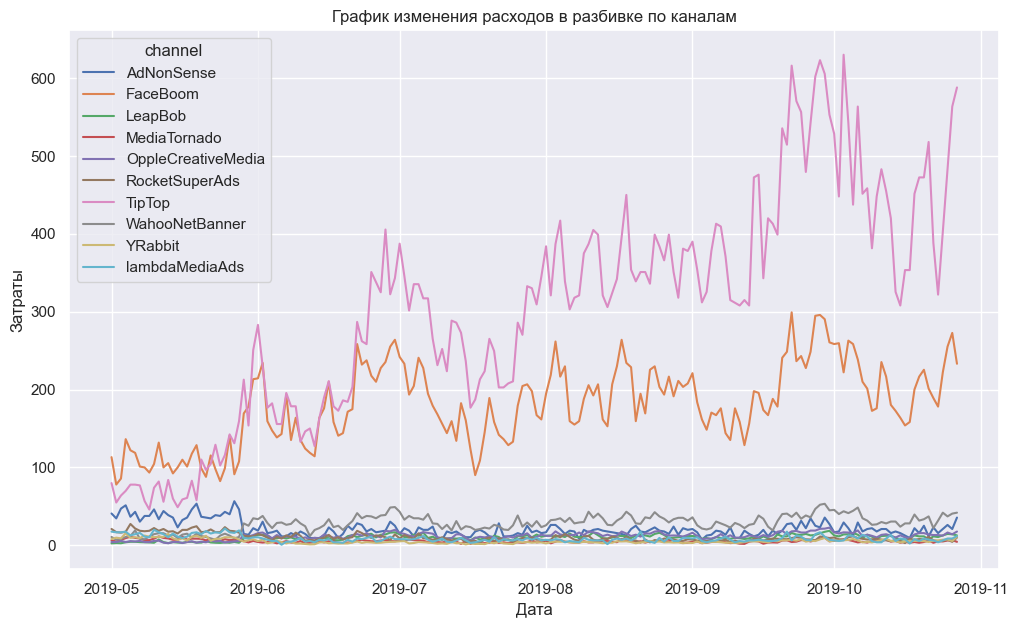

In [116]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 7),
           grid=True,)

plt.title('График изменения расходов в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

### CAC по каждому источнику.

In [118]:
profiles = profiles.query('channel != "organic"') # органика дальше не пригодится
cac_channel = (
    profiles
    .groupby('channel')
    .agg({'user_id': 'count', 'acquisition_cost': 'sum'})
    )
cac_channel['CAC'] = (cac_channel['acquisition_cost'] / cac_channel['user_id']).round(2)
cac_channel.sort_values(by='CAC', ascending=False)

,user_id,acquisition_cost,CAC
channel,,,
TipTop,19561,54751.30,2.80
FaceBoom,29144,32445.60,1.11
AdNonSense,3880,3911.25,1.01
lambdaMediaAds,2149,1557.60,0.72
WahooNetBanner,8553,5151.00,0.60
RocketSuperAds,4448,1833.00,0.41
OppleCreativeMedia,8605,2151.25,0.25
MediaTornado,4364,954.48,0.22
YRabbit,4312,944.22,0.22


In [119]:
# дополнительные срезы по САС
print('Самый дорогостоящий канал TipTop :', cac_channel['CAC'].max(), 'руб.')
print('Самый экономичный канал LeapBob :', cac_channel['CAC'].min(), 'руб.')

Самый дорогостоящий канал TipTop : 2.8 руб.
Самый экономичный канал LeapBob : 0.21 руб.


In [120]:
cac_all = (profiles['acquisition_cost'].sum() / profiles['user_id'].count()).round(2)
print('Cредний CAC пользователя для всего проекта:', cac_all, 'руб.')

Cредний CAC пользователя для всего проекта: 1.13 руб.


**Вывод по блоку:**  
  
- Общая сумма расходов на рекламу составляет 105 497.3 руб.  
- Рекламные расходы в United States	составляют 86% всех рекламных затрат рекламной кампании.  
- Каналы с самыми большими финансовыми вливаниями:  
TipTop:-----------54 751.30 руб.------51.90%  
FaceBoom:-----32 445.60 руб-------30.75%.    
При этом по количеству привлеченных клиентов канал **TipTop** не является лидером - 2 место (19 561 чел.), и по доле платящих клиентов  только лишь 4 место с долей 9,6%.  
Канал **FaceBoom** показывает самую высокую эффективность по привлечениям (29 144 чел.) и по доле платящих пользователей (12,2%).  
- По затратам на привлечение одного пользователя опять в лидерах канал **TipTop** - 2,8 руб. Самый низкозатратный канал **LeapBob** - 0.21 руб.   
- Cредний CAC пользователя для всего проекта: 1.13 руб.  

## Часть 5. Оценка окупаемости рекламы

#### Требуется:

Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы.  
Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.  
Необходимость включения в анализ органических пользователей определить самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения.  
То же самое сделать с удержанием пользователей.  
Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам.  
Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам.  
Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.  
Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Осветить вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Написать вывод, описать возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Общая окупаемость рекламы

##### Даты и фильтрация органики были установлены выше по проекту

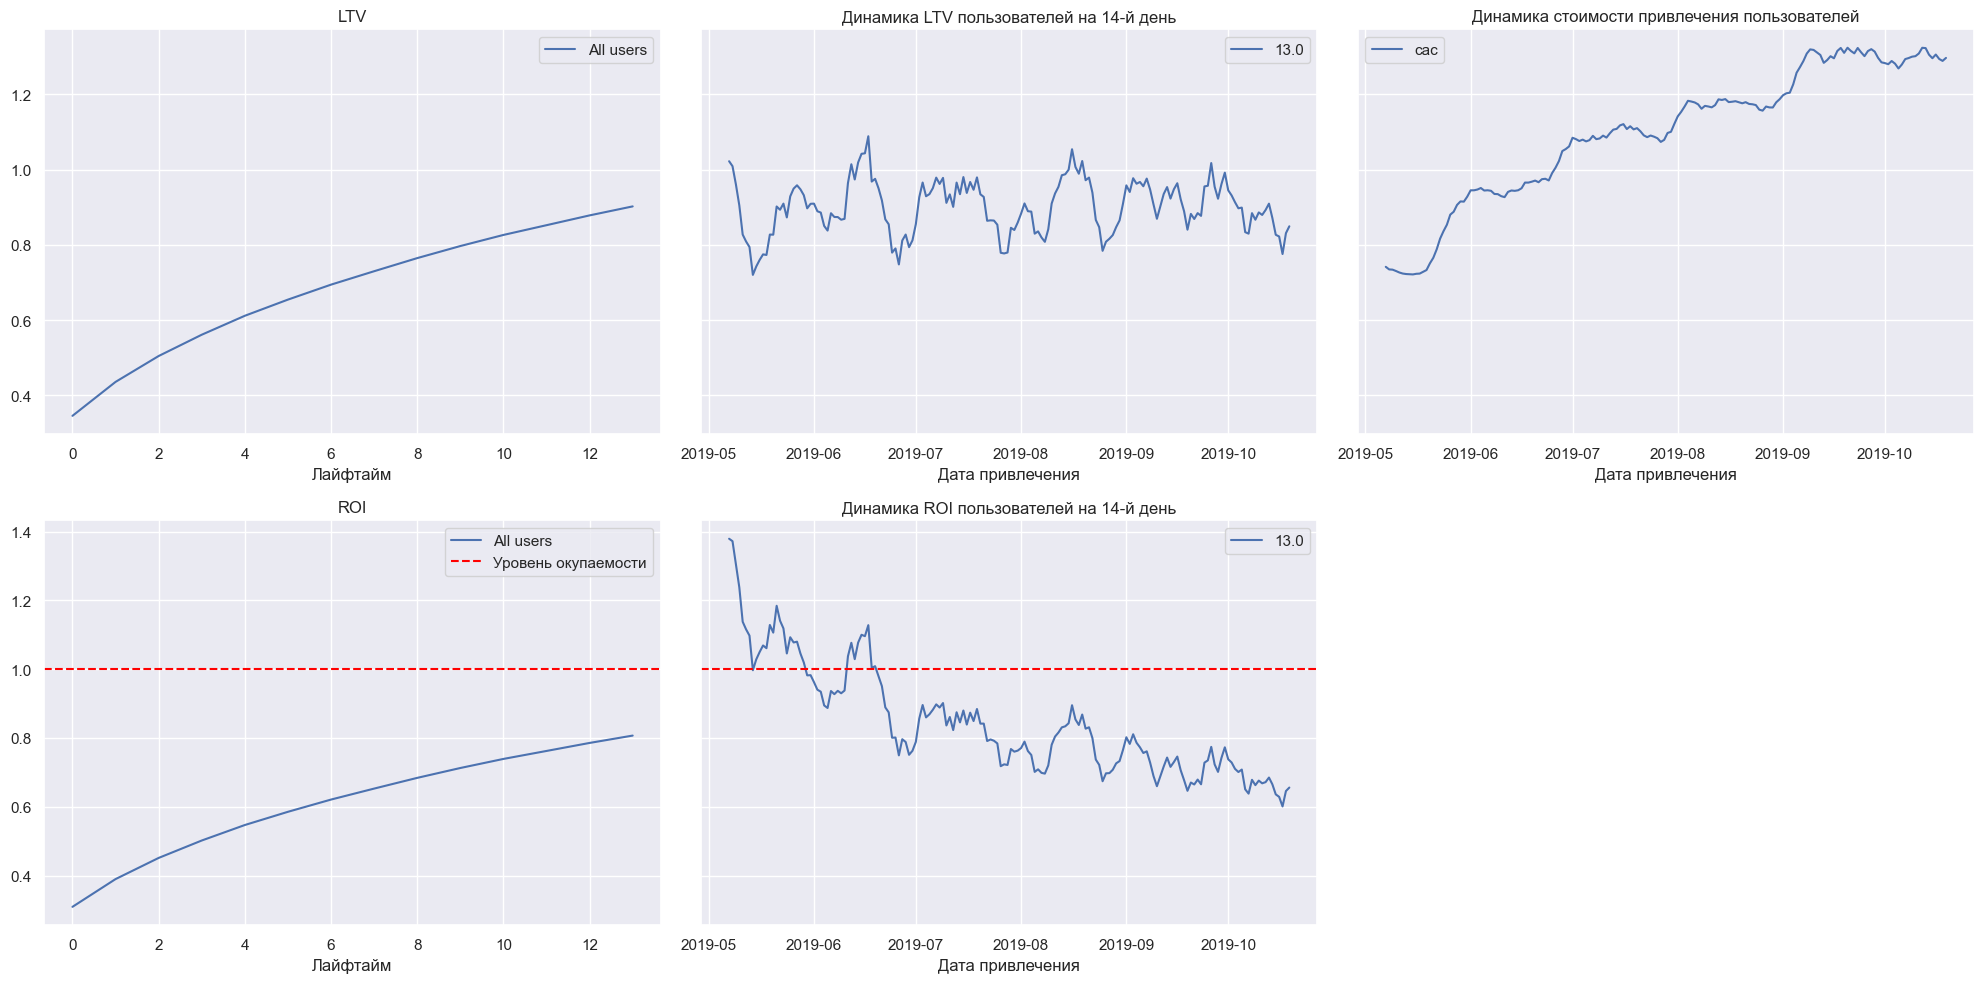

In [105]:
# общая окупаемость, LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Краткое описание бизнес-показателей по всей рекламной кампании

- Общий показатель LTV растёт, динамика стабильная, что означает, что с привлечением пользователей, на первый взгляд, проблем нет.  
- Затраты на рекламу также растут.
- ROI к 12 лайфтайму — чуть выше 80% до уровня окупаемости. 
- ROI в динамике уже к июлю стал ниже порога окупаемости.  
Это говорит о том, что рекламная кампания убыточная. Несмотря на то, что привлечение пользователей стабильно. Стоимость привлечения клиента в данном случае неоправдана.
Очень важно разобраться в причинах безуспешной рекламной кампании, чтобы попытаться вернуть инвестиции.
Для этого необходимо более детально изучить доступные характеристики пользователей: страна, канал, устройство первого посещения.

###  Окупаемость рекламы с разбивкой по устройствам.

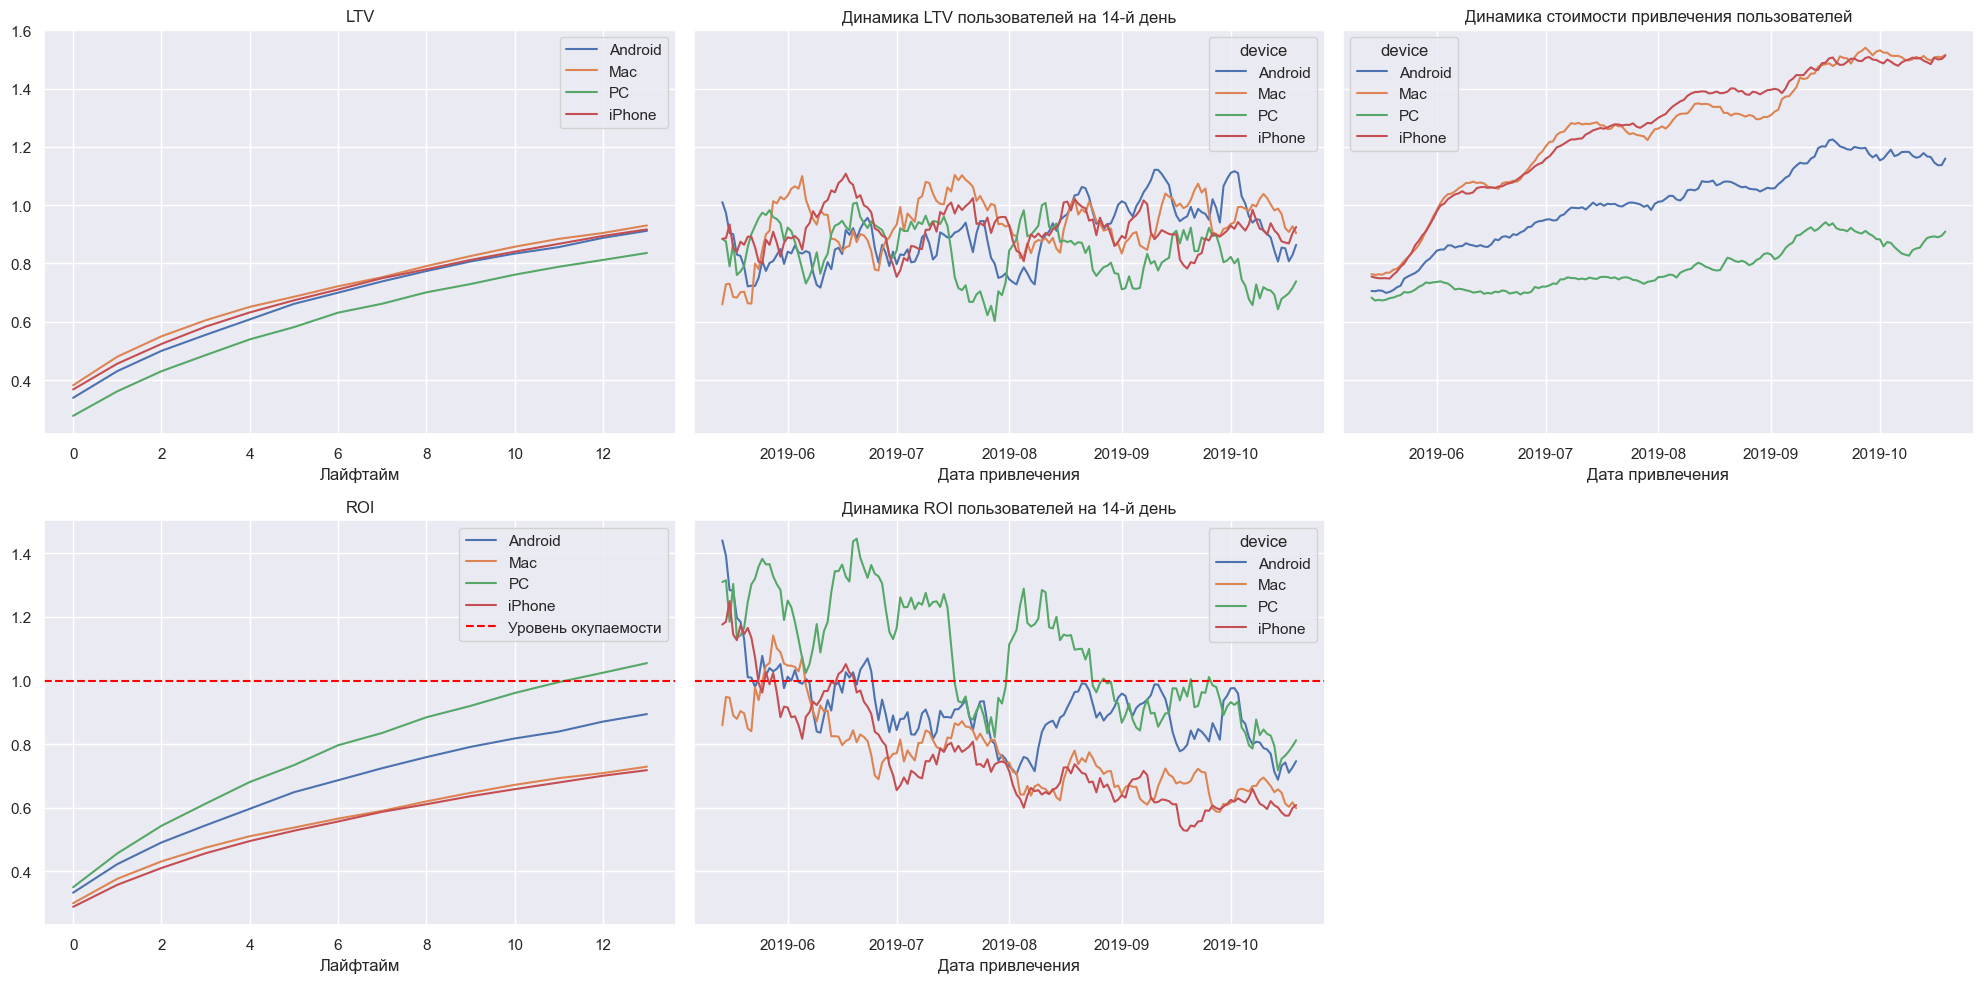

In [123]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Платящие пользователи реже всего заходят с 'PC'.
- Динамика привлечения стабильная. 
- 'iPhone' и 'Mac'- самые высокие затраты на привлечение пользователя.
- ROI на 11 лайфтайм достигают порога окупаемости только клиенты на 'PC'. 
- ROI в динамике выше порога окупаемости только у клиентов на 'PC', но в сентябре и они уходят ниже уровня безубыточности. 

 Совокупно успешной (очень условно) можно назвать кампанию по PC, но проблемы есть и у неё

#### Конверсия с разбивкой по устройствам в разрезе отдельных сегментов

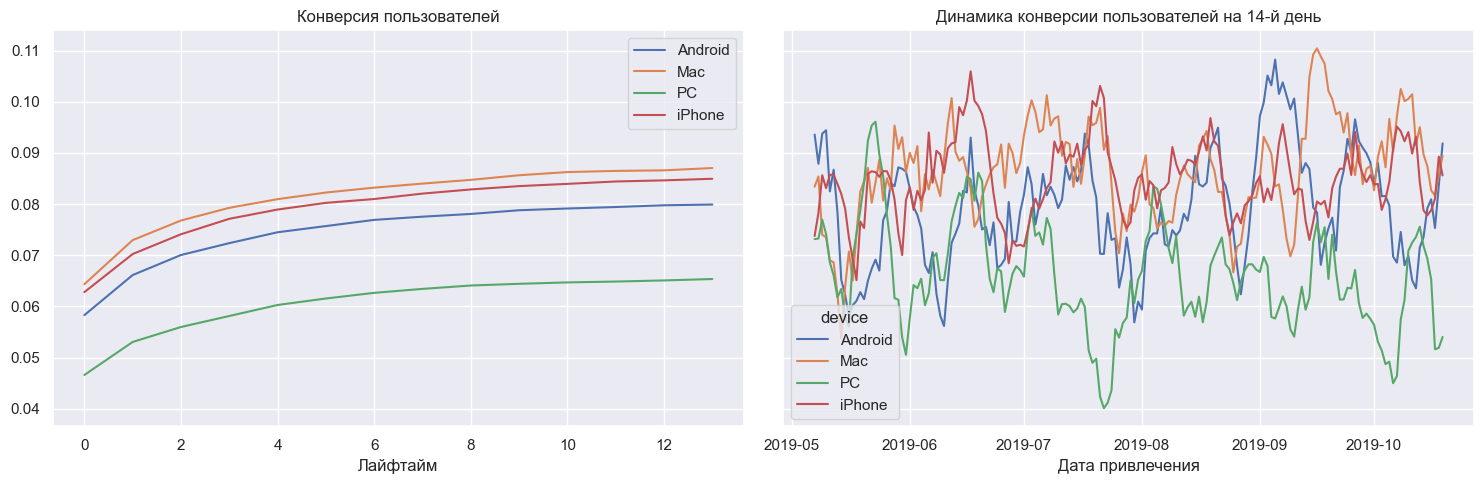

In [124]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи 'Mac', 'Android' и 'iPhone' конвертируются хорошо, причём постоянно. Пользователи  на 'PC' с самой низкой конверсией.

#### Удержание с разбивкой по устройствам в разрезе отдельных сегментов

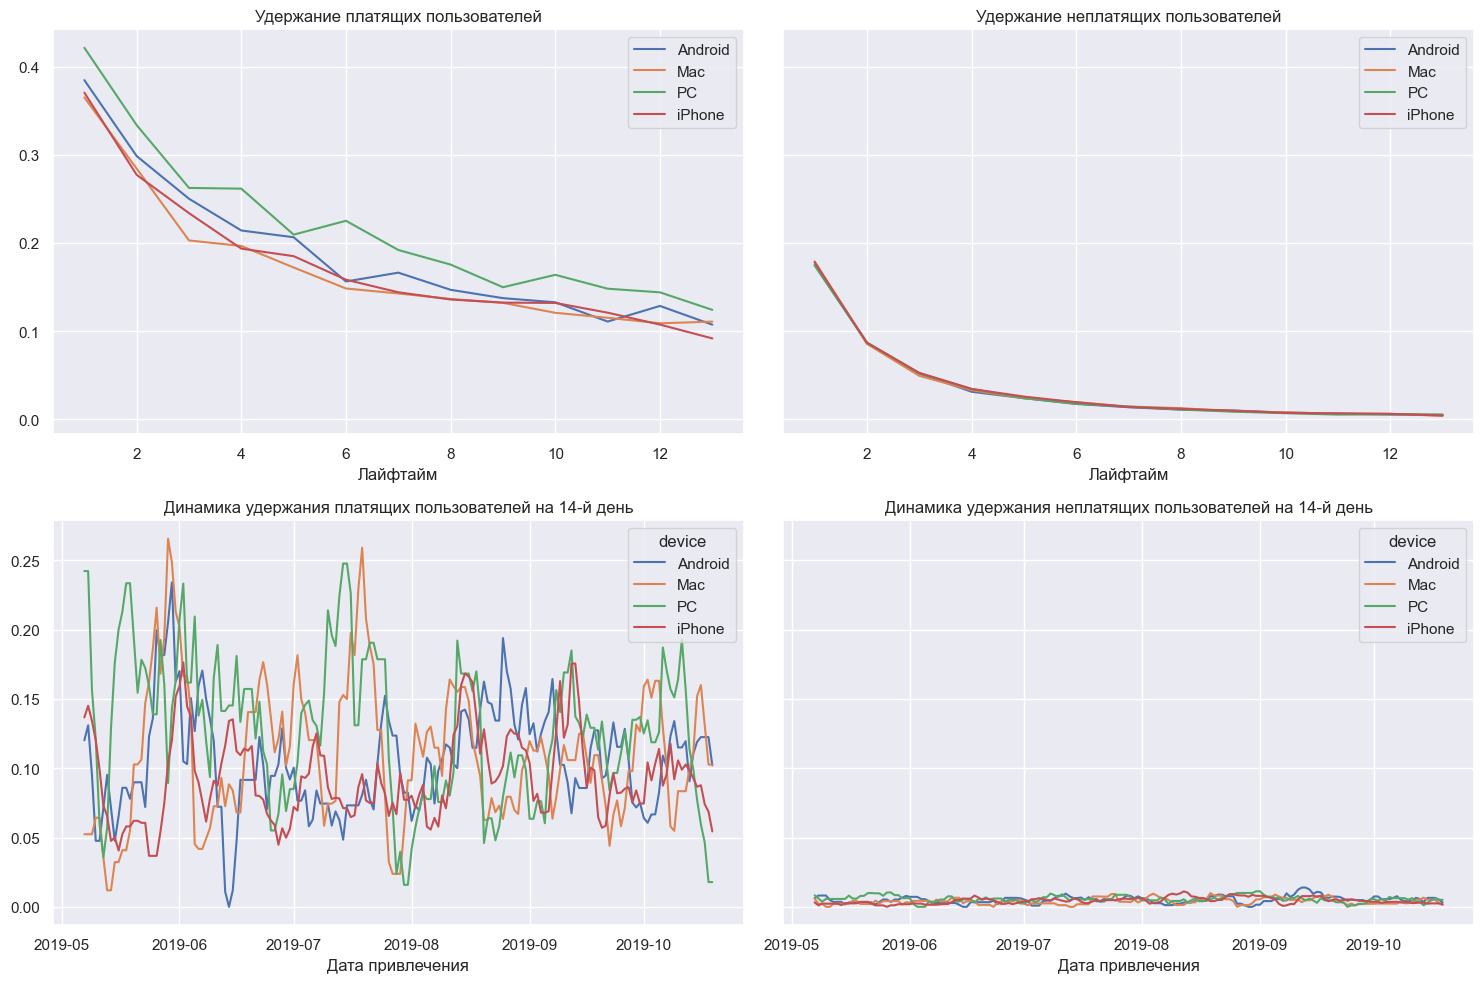

In [125]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания неплатящих пользователей примерно одинаковая.  
У платящих пользователей более разнообразная картина, лучше всего удерживаются пользователи на 'PC'.  
Удержание в устройствах достаточно стабильно.

###  Окупаемость рекламы с разбивкой по странам.

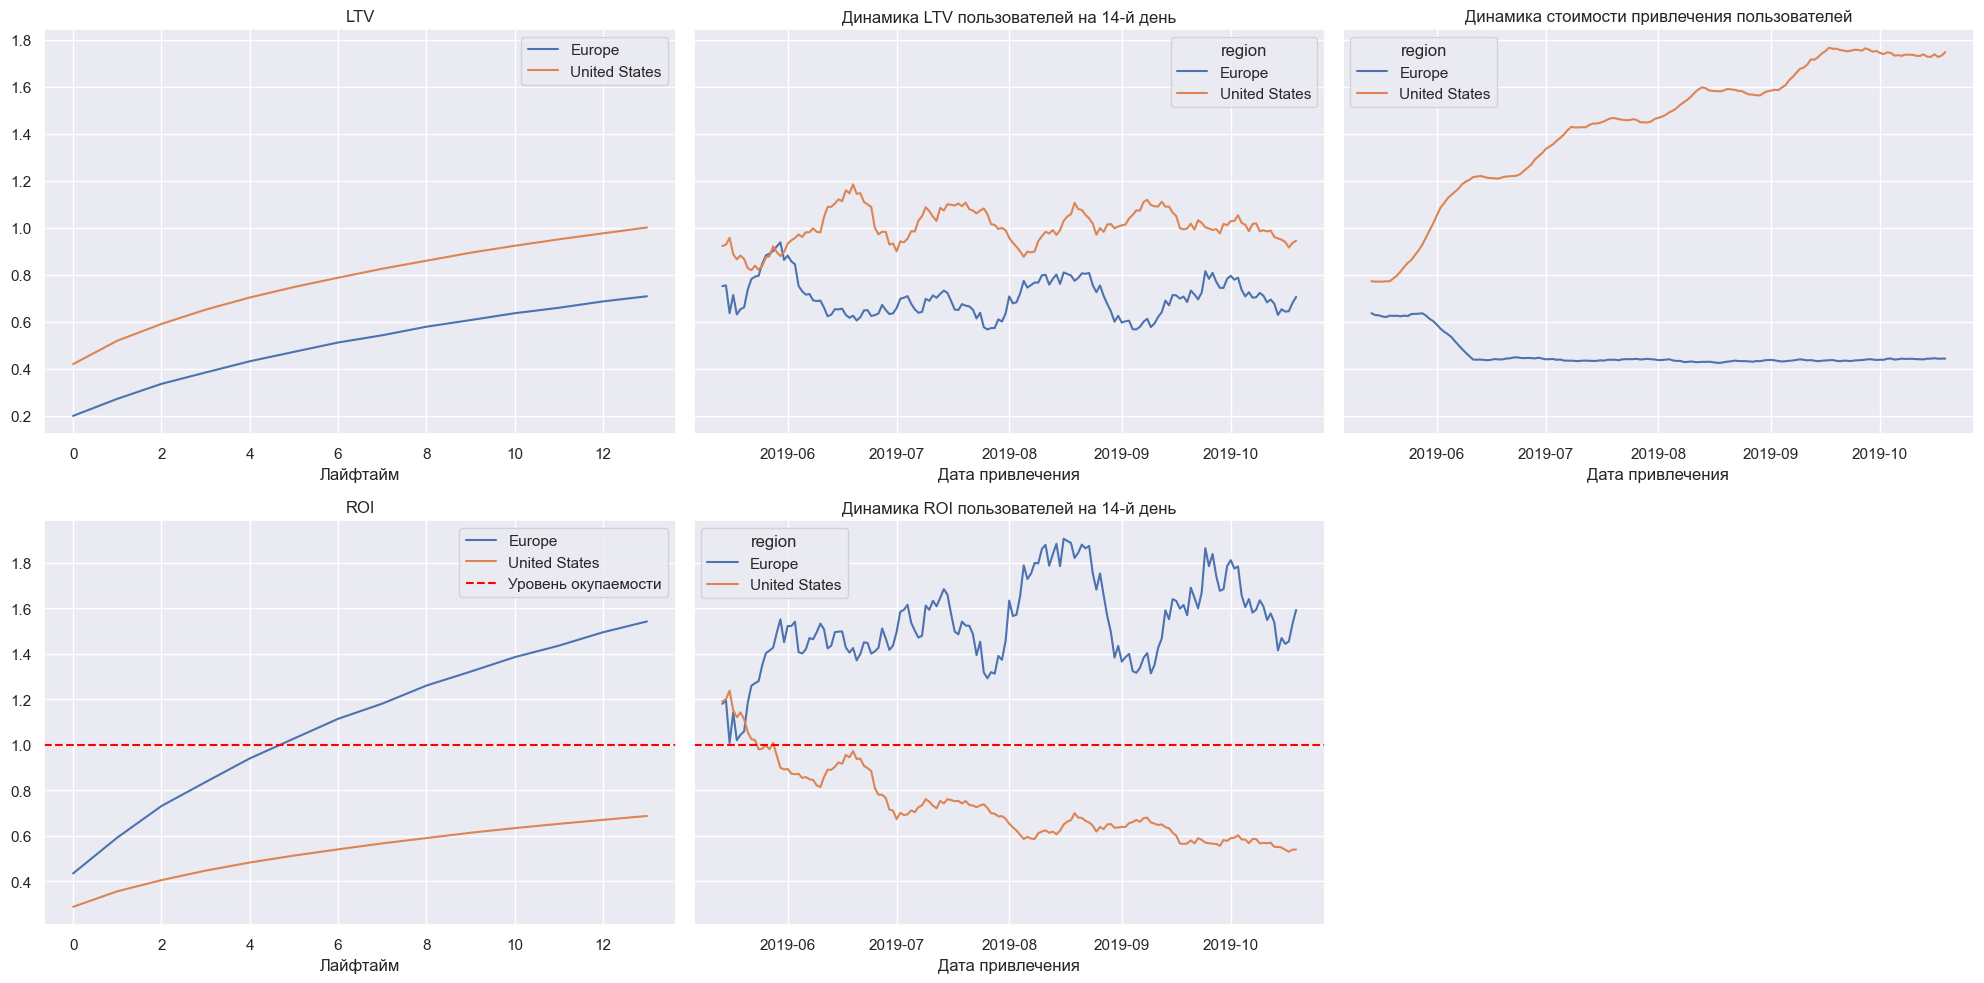

In [126]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Платящие пользователи больше всего заходят в 'United States'.
- Динамика привлечения стабильная. 
- В 'United States' аномально высокие (особенно в сравнении с другими странами) затраты на привлечение пользователя.
- ROI на 6 лайфтайм выше порога окупаемости у всех стран, кроме 'United States'. 
- ROI в динамике выше порога окупаемости у всех стран, кроме 'United States'.  
  
Стоит более пристально разобраться с 'United States', США сильно выделяется на фоне других стран.

#### Конверсия с разбивкой по странам

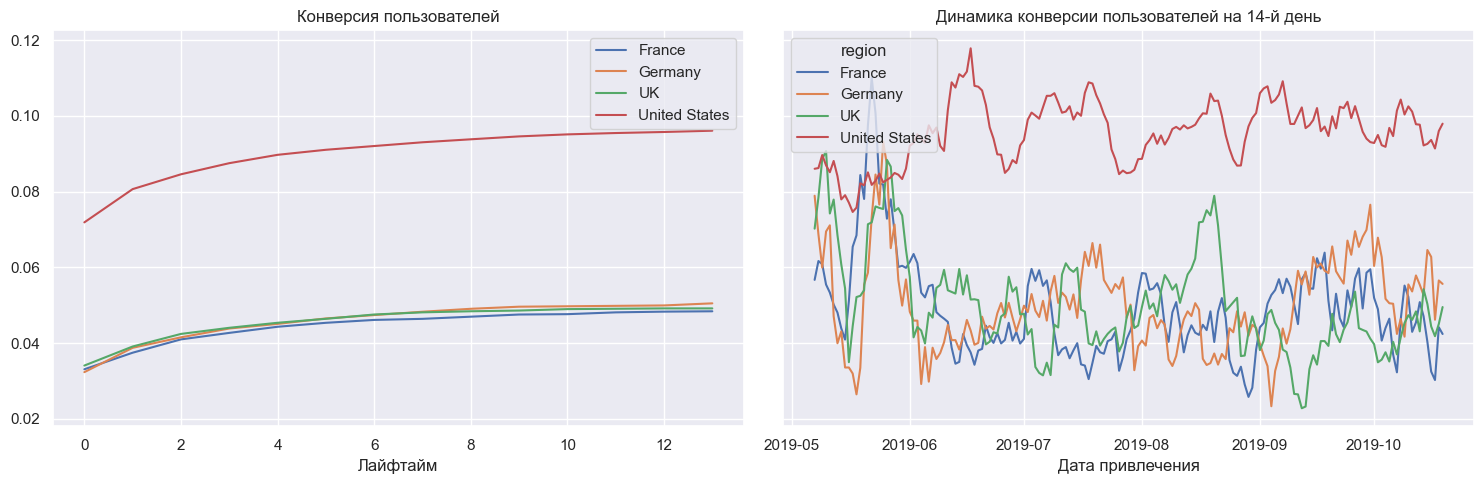

In [110]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая лучшая конверсия в 'United States, но это никак не влияет на убыточность рекламной кампании в этом регионе.

#### Удержание с разбивкой по странам

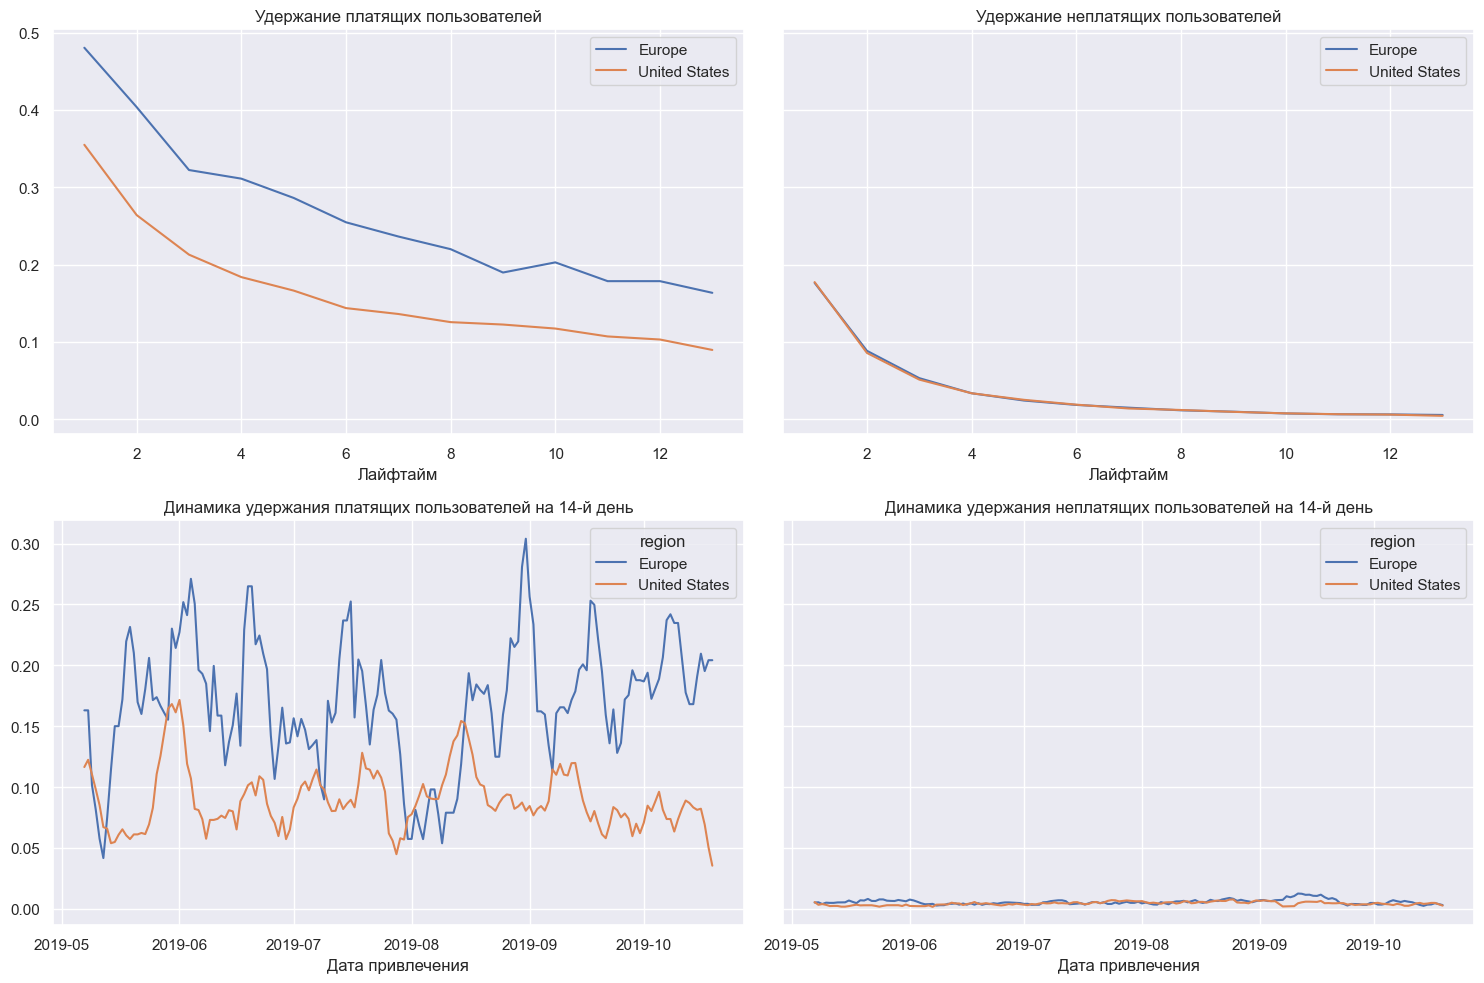

In [127]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания неплатящих пользователей примерно одинаковая.  
Удержание платящих пользователей в 'United States' значительно ниже остальных регионов, при самой высокой доле клиентов.  
Динамика удержания также стабильно низкая.

###  Окупаемость рекламы с разбивкой по каналам.

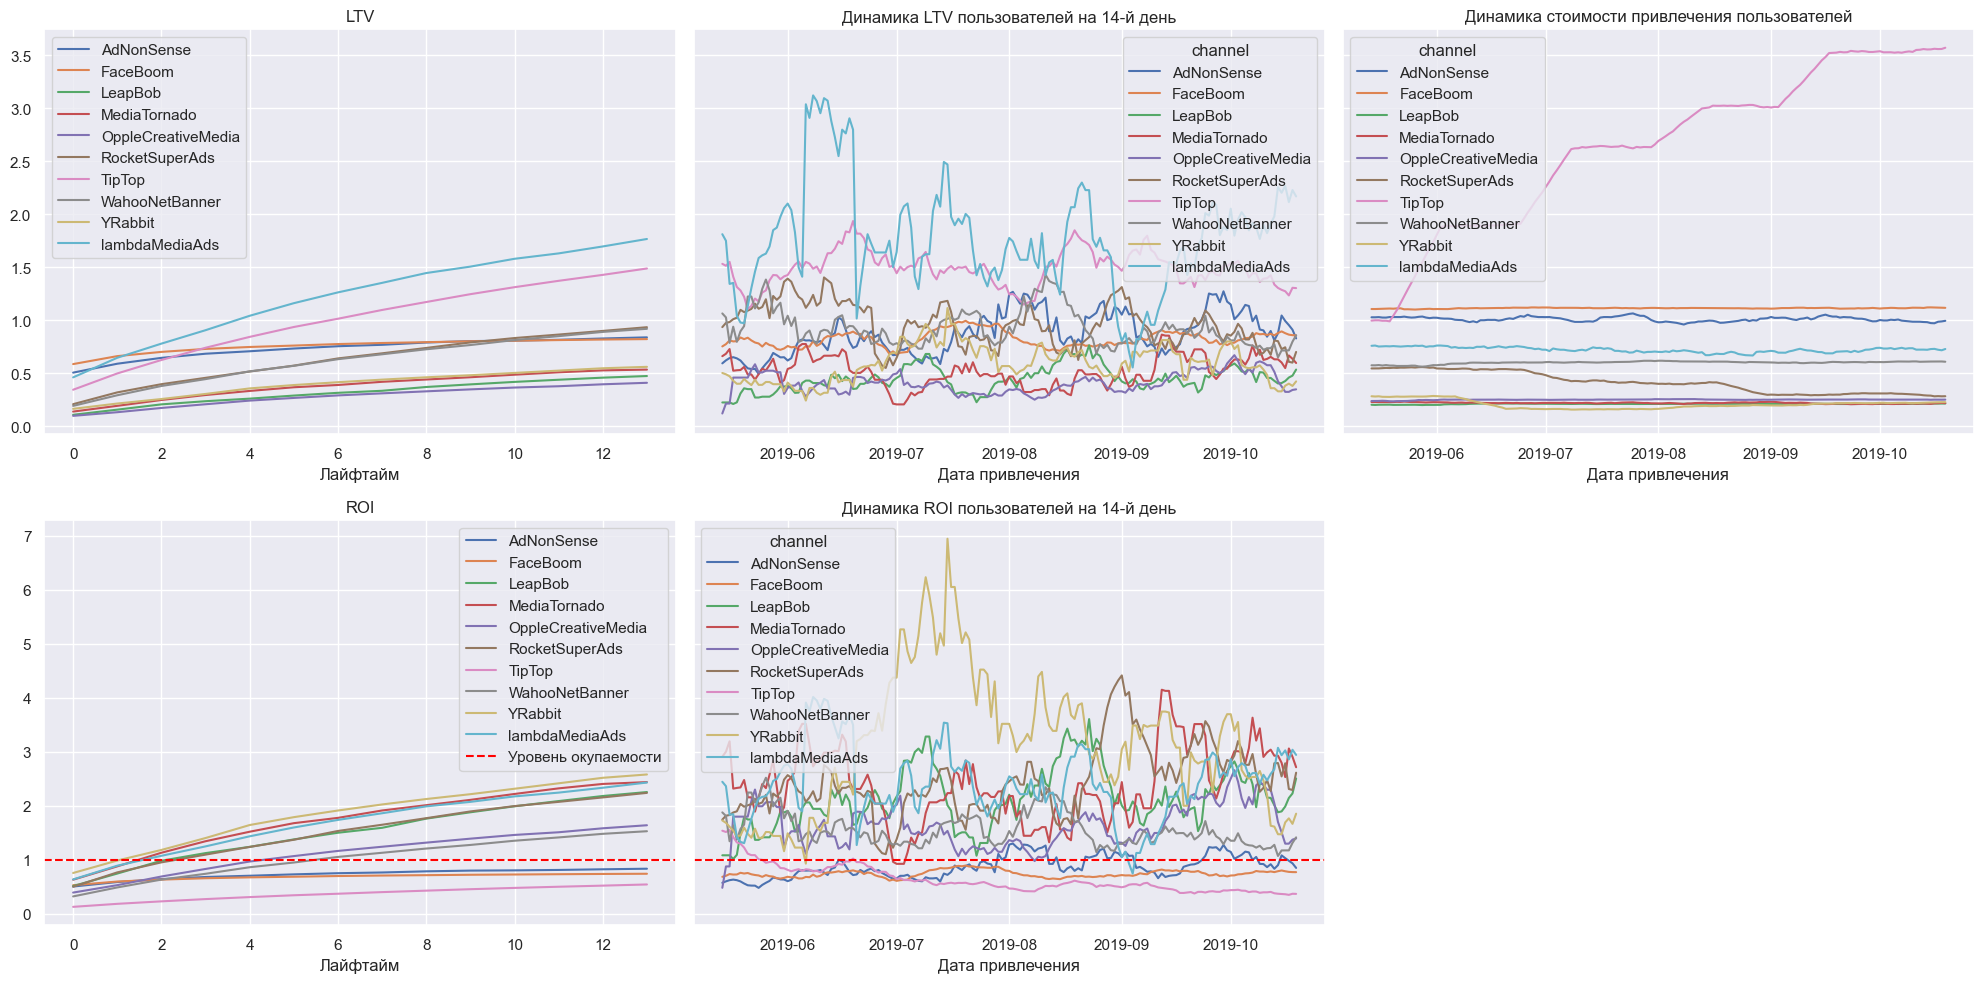

In [112]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Платящие пользователи лучше всего приходят с каналов 'lambdaMediaAds' и 'TipTop'.
- Динамика привлечения стабильная. 
- На канале 'TipTop'- самые высокие затраты на привлечение пользователя.
- На канале 'TipTop' ROI ниже порога окупаемости. Стоит ли так тратиться на рекламу, несмотря на привлечение новых пользователей?  

#### Конверсия с разбивкой по каналам

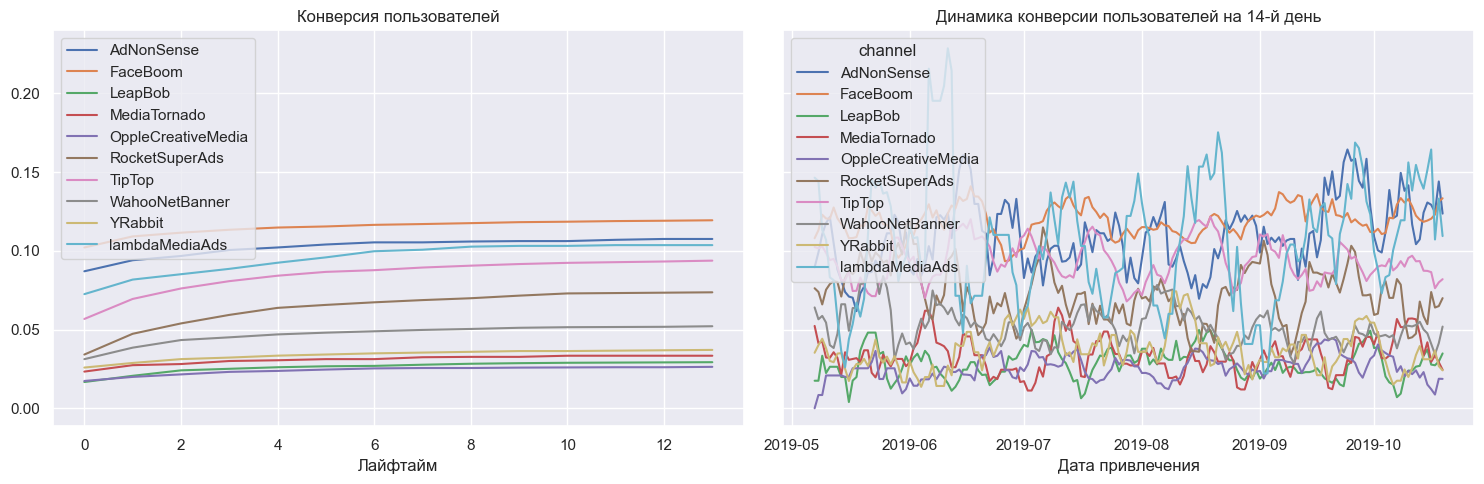

In [113]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Канал 'FaceBoom' - лидер по конверсии, также в ТОП-5 входят каналы: 'AdNonSense', 'lambdaMediaAds',  'TipTop',  'RocketSuperAds'.

#### Удержание с разбивкой по каналам

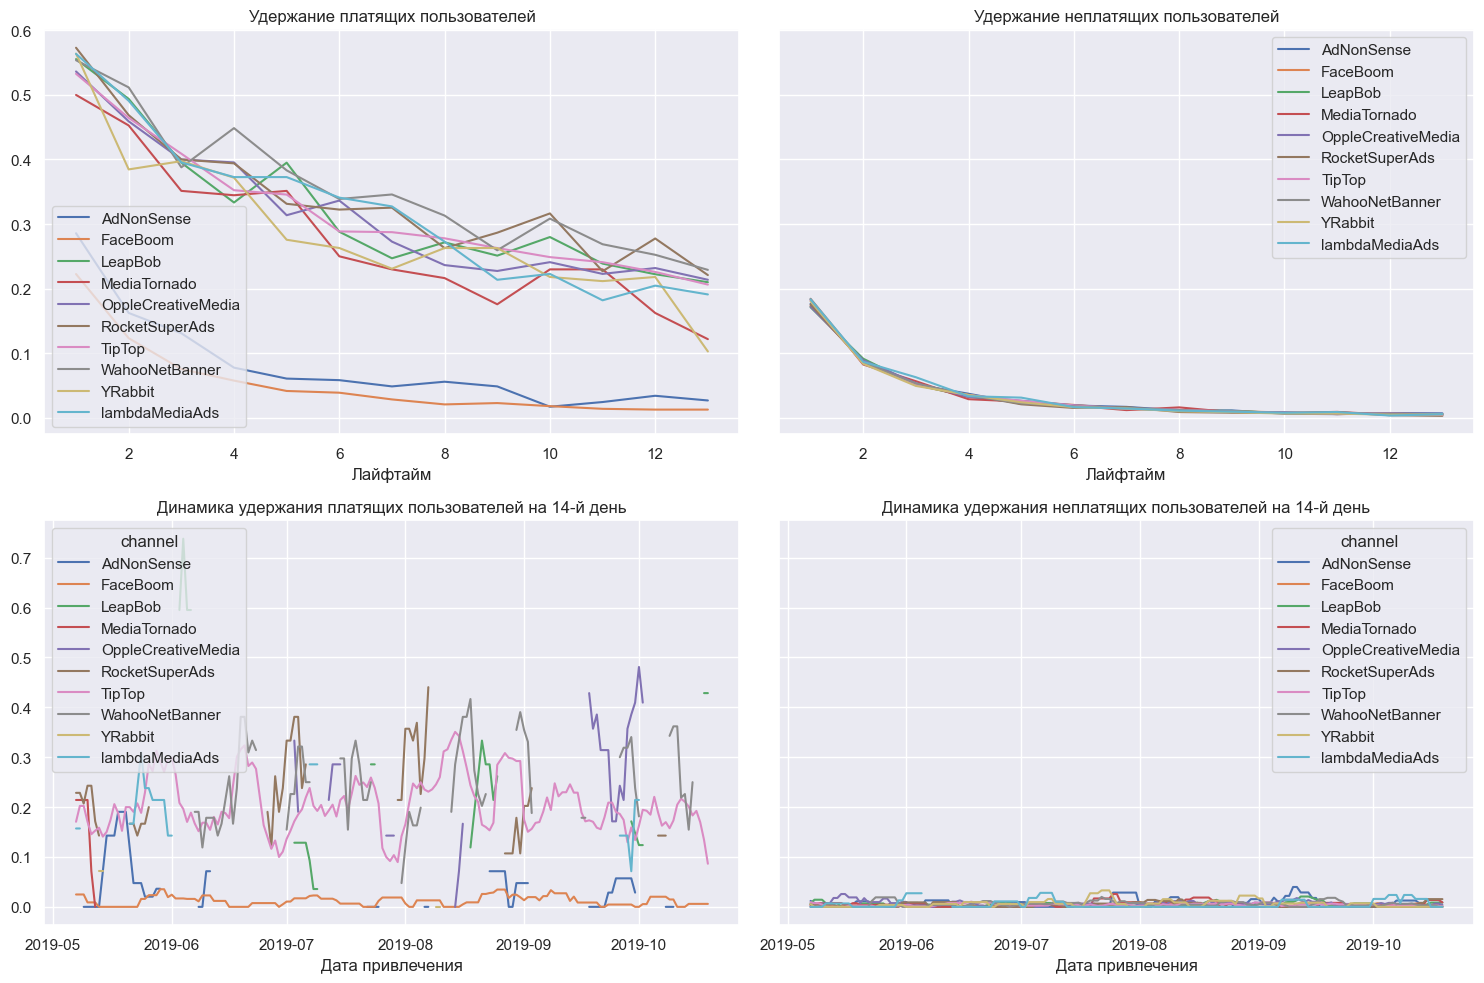

In [114]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания неплатящих пользователей примерно одинаковая.  
Удержание платящих пользователей хуже всего в 'FaceBoom', рядом с ним в аутсайдерах канал 'AdNonSense'.  
Показатели по каналам довольно похожи на страны, лидеры конверсии имеют проблемы с удержанием.

#### Вывод по блоку:  
- Рекламная кампания направлена на привлечение новых пользователей, но она не окупается.  
- Все устройства, кроме 'PC' являются убыточными, но и 'PC' с сентября преодолевают порог окупаемости в отрицательную сторону. Также у пользователей с 'PC' самый низкий уровень конверсии.  
- Не преодолевает порог окупаемости и остается убыточной рекламная кампания в стране 'United States' при худшем показателе удержания и лучшем показателе конверсии.  
- На канале 'TipTop' - самые высокие затраты на привлечение пользователя. Рекламная кампания на данном канале тоже является высокоубыточной. Худшие показатели удержания новых пользователей на каналах 'FaceBoom' и 'AdNonSense'.  
  
Причины проблем и рекомендации отделу рекламы: 
Отдельного и более детального анализа требует страна 'United States'. Рекомендовано сравнить цены на рекламу по каналам для разных стран. 
Проблемы окупаемости могут быть вызваны слишкой высокой ценой на рекламу в канале 'TipTop'. Есть ли смысл вложений в этот канал на данном этапе? Возможно, что каналы  'lambdaMediaAds' и 'FaceBoom' будут более перспективными в плане окупаемости, привлечения и удержания новых пользователей.  
Также проедполагается, что в 'United States' наибольшее количество пользователей с 'iPhone' и 'Mac', а с этих устройств самые плохие показатели окупаемости. Может есть какие-то технические проблемы, которые требуют устранения?


## Общий вывод.
Даты анализируемого периода: с 1 мая 2019 года по 27 октября 2019 года.  
Посетители приходят из стран: United States, UK, France, Germany.  
Клиенты пользуются устройствами: iPhone, Android, PC, Mac.  
Каналы для рекламного продвижения:'AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds'  
  
Рекламная кампания **убыточная**, что влечёт за собой общие убытки по всей компании.  
**Основная причина неуспеха рекламной кампании** в том, что она по финансовым вложениям на 86% проходит в United States.  
ROI в 'United States' ниже порога окупаемости и с худшим показателем удержания новых клиентов, несмотря на хорошие показатели конверсии.  
Также основная часть средств используется на рекламу в канале TipTop, где самая дорогая стоимость привлечения  пользователя - 2,8 руб. и ROI ниже порога окупаемости.  
Усугубляет положение и то, что основными девайсами в United States являются 'iPhone' и 'Mac', где выявлены также самые высокие затраты на привлечение пользователя.  
  
### Главная рекомендация отделу маркетинга - полностью пересмотреть рекламную стратегию.  
- Перераспределить рекламный бюджет в другие страны (например, пропорционально количеству населения).  
  
- Более детально проанализировать страну United States и также перераспределить бюджет внутри по каналам продвижения. 
  
- Проверить работу приложения в устройствах 'iPhone', 'Mac' и 'Android' на предмет технических проблем.  
  
- Провести сравнение цен на рекламу по странам в разных каналах и перенаправить усилия в наиболее перспективные.  
  
- Обратить внимание на продвижение в каналах YRabbit, 'lambdaMediaAds', 'RocketSuperAds', 'MediaTornado'.  
  
- У канала 'FaceBoom'  ROI ниже порога окупаемости, но с него приходит большое количество новых пользователей и самая большая доля платящих (12,2%), поэтому стоит также продумать, как изменить рекламную работу в этом канале, чтобы сделать его доходным.  

- Проанализировать метрику "Доля платящих клиентов", т.к. это важный ресурс для окупаемости рекламной кампании и поступления общей валовой прибыли.  Основная доля платящих клиентов приходит с очень разных каналов - FaceBoom, AdNonSense, lambdaMediaAds, TipTop, и отличия каналов и по конверсии, и по удержанию, и по приходу новых пользоователей, а самое главное, по расходам на покупку рекламы. Аналитику стоит проводить одновременно в разрезе стран.
      
- Метрика "Конверсия" самая высокая в США. В разрезе стран необходимо изучить причины низкой конверсии в UK, France, Germany. Значительная доля приходящих пользователей из United States, но не стоит забывать, что все основные каналы в этой стране, в которые вложены рекламные средства, убыточны (в 2 каналах 80% рекламного бюджета). Стоит рассмотреть целесообразность  размещения рекламы в TipTop (50% рекламного бюджета).  
      
- Ошибочным решением было направить основной фокус кампании на самые известные каналы. На первый взгляд, это оправдано широким охватом аудитории, но это самые высокие затраты на покупку рекламы. Необходимо сконцентрироваться на анализе каналов с учетом региональных особенностей и менталитета стран, в которых они представлены.
      
- Исходя из полученных сведений об уже проведённой рекламной кампании, а именно, что 80% рекламного бюджета была израсходована в United States, экстраполировать имеющиеся выводы по United States на корректровку рекламной стратегии в UK, France, Germany и не повторить сделанные ошибки.
    

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Все абсолютно верно, классные дополнения. Еще для наглядности все же можно посмотреть на конверсию, удержание, LTV, ROI и САС в разрезе США-Европа, например выделив их вот так:

In [115]:
profiles.replace({'region' : ['UK', 'Germany', 'France']}, {'region' :'Europe'}, inplace=True, regex=True)
profiles['region'].unique()

array(['United States', 'Europe'], dtype=object)

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> А также при помощи обычного groupby посмотреть на то, как сами каналы представлены в странах, тогда будет наглядно видно, что самые дорогие каналы есть только в США